
### A description of the problem and a discussion of the background.

We are interested to estimate some aspects of the investment potential for Swedish communes. 

For those thinking where to start some sort of a business in Sweden it is important to understand what geographical locations have more potential for the development.

The question is important as there is no clear answer to the questions: which communes (cities) are better for investing: “rich” or “poor”, “big” or “small”? It is obvious that there are rich and active communes (like capital cities), but they might be oversaturated with businesses which  results in high competition and, hence, low profitability of new businesses. On the other hand, “small” and “quiet” communes might be missing small businesses and, even though level of economical activities might be low there, the competition level is also significantly lower than in big cities
We will try to analyze the level of “saturation” of Swedish communes with various businesses and try to segment them according to the perspectives of new business development.

The question is important for those potential enterpreneurs that are thinking about the best locations to start a new business in Sweden.

### A description of the data.

To analyze the problem we will start with the following data sources:

a.	SCB site (Swedish statistics bureau)  http://www.statistikdatabasen.scb.se/pxweb/en/ssd/  where it is possible to find the data on population, average income and a lot of other statistics for Swedish communes. We downloaded some data and put it here for further processing: https://github.com/Dmitry-Za/Coursera_IBM_DataScience_Final/blob/master/se%20medelinkomst%20population.xlsx

b.	The file https://raw.githubusercontent.com/peterdalle/svensktext/master/platser/kommuner.csv where we can find geo coordinates for swedish communal cities

c.	Foursquare service that we will use to measure the quantity of businesses around the communal center cities. 


### How the data will be used to solve the problem.

a.	Using Foursquare we will count businesses around communal centers. They have different sizes, so we will approximate the search area with a circle having the same square as a corresponding commune. 


b.	We will see how the quantity of businesses correlates to the population.

c.	We will try to determine communes “undersaturated” with businesses that might have some business potential.

d.	We will then analyze the average income in the communes and suppose that those of them that have higher average income have higher potential for new business development.

e.	Based on the above, we will develop recommendations for investing in starting new businesses in different communes.



### Let's load necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Installing GeoPy...\n")
!pip -q install geopy
print("GeoPy has been successfully installed!\n")

print("Installing Folium...\n")
!pip -q install folium
print("Folium has been successfully installed!\n")

!pip install requests

!pip install xlrd

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install lxml
import lxml

print('Libraries imported.')




Installing GeoPy...

GeoPy has been successfully installed!

Installing Folium...

Folium has been successfully installed!

Libraries imported.


### Read csv file with geodata for swedish cities

In [2]:
df_geo=pd.read_csv("https://raw.githubusercontent.com/peterdalle/svensktext/master/platser/kommuner.csv ")
df_geo.head()

,code,name,region,population,area,land,sea,ocean,density,bounds_ne_lat_google_2015_05_28,bounds_ne_lng_google_2015_05_28,bounds_sw_lat_google_2015_05_28,bounds_sw_lng_google_2015_05_28,location_lat_google_2015_05_28,location_lng_google_2015_05_28
0,114,Upplands Väsby kommun,Stockholms län,43891,83.82,75.01,4.84,0.00,585.14,59.557618,18.004065,59.458273,17.857237,59.519610,17.928340
1,115,Vallentuna kommun,Stockholms län,32785,368.45,357.74,10.71,0.00,91.64,59.531623,17.968060,59.528925,17.965362,59.530274,17.966711
2,117,Österåkers kommun,Stockholms län,43293,554.65,312.37,10.90,231.18,138.60,59.600716,18.968054,59.384954,18.144779,59.500058,18.352485
3,120,Värmdö kommun,Stockholms län,42000,2980.99,448.12,8.46,2523.54,93.72,59.364091,18.462124,59.298442,18.325353,59.333333,18.383333
4,123,Järfälla kommun,Stockholms län,74412,63.03,53.79,1.11,0.00,1383.38,59.415743,17.852811,59.404386,17.820797,59.410065,17.836804


### Read fresh statistics for population and income from statistics bureau


In [3]:
df_income=pd.read_csv("https://raw.githubusercontent.com/Dmitry-Za/datasciencecoursera/master/semedelinkomstpopulation2.csv")
df_income.head() 

,Code,Average Income year thousands crowns,Population
0,114,283.9,46786
1,115,312.2,34090
2,117,337.2,45574
3,120,320.0,45000
4,123,272.8,79990


### Let's drop unnecessary columns, rename some and merge the data

In [4]:
 
df_geo.head()

,code,name,region,population,area,land,sea,ocean,density,bounds_ne_lat_google_2015_05_28,bounds_ne_lng_google_2015_05_28,bounds_sw_lat_google_2015_05_28,bounds_sw_lng_google_2015_05_28,location_lat_google_2015_05_28,location_lng_google_2015_05_28
0,114,Upplands Väsby kommun,Stockholms län,43891,83.82,75.01,4.84,0.00,585.14,59.557618,18.004065,59.458273,17.857237,59.519610,17.928340
1,115,Vallentuna kommun,Stockholms län,32785,368.45,357.74,10.71,0.00,91.64,59.531623,17.968060,59.528925,17.965362,59.530274,17.966711
2,117,Österåkers kommun,Stockholms län,43293,554.65,312.37,10.90,231.18,138.60,59.600716,18.968054,59.384954,18.144779,59.500058,18.352485
3,120,Värmdö kommun,Stockholms län,42000,2980.99,448.12,8.46,2523.54,93.72,59.364091,18.462124,59.298442,18.325353,59.333333,18.383333
4,123,Järfälla kommun,Stockholms län,74412,63.03,53.79,1.11,0.00,1383.38,59.415743,17.852811,59.404386,17.820797,59.410065,17.836804


In [5]:
df_geo=df_geo[['code','name','area','location_lat_google_2015_05_28','location_lng_google_2015_05_28']]
df_geo.head()

,code,name,area,location_lat_google_2015_05_28,location_lng_google_2015_05_28
0,114,Upplands Väsby kommun,83.82,59.519610,17.928340
1,115,Vallentuna kommun,368.45,59.530274,17.966711
2,117,Österåkers kommun,554.65,59.500058,18.352485
3,120,Värmdö kommun,2980.99,59.333333,18.383333
4,123,Järfälla kommun,63.03,59.410065,17.836804


In [6]:
df_geo.rename(columns={'code': 'Code','location_lat_google_2015_05_28':'lat','location_lng_google_2015_05_28':'lon'}, inplace=True)
df_geo.head()

,Code,name,area,lat,lon
0,114,Upplands Väsby kommun,83.82,59.519610,17.928340
1,115,Vallentuna kommun,368.45,59.530274,17.966711
2,117,Österåkers kommun,554.65,59.500058,18.352485
3,120,Värmdö kommun,2980.99,59.333333,18.383333
4,123,Järfälla kommun,63.03,59.410065,17.836804


In [7]:
df_se = pd.merge(df_income,df_geo, on='Code')
df_se

,Code,Average Income year thousands crowns,Population,name,area,lat,lon
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804
5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225
6,126,277.8,112848,Huddinge kommun,140.67,59.236330,17.982156
7,127,231.8,94606,Botkyrka kommun,222.31,59.245941,17.840858
8,128,288.4,16750,Salems kommun,71.09,59.200000,17.766667
9,136,260.2,92095,Haninge kommun,2161.18,59.182724,18.151091


In [8]:
print(len(df_se.index))

290


In [9]:
df_se.rename(columns={'Average Income year thousands crowns': 'Av_income'}, inplace=True)
df_se.head()

,Code,Av_income,Population,name,area,lat,lon
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804


### Now we can show all communes on the map

In [10]:
# create map of Sweden 
map_se = folium.Map(location=[63.461415, 16.104141], zoom_start=4)

# add markers to map

for name, lat, lon in zip(df_se['name'], df_se['lat'], df_se['lon']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_se)  

    
map_se

### Now it is time to start using Foursquare to count the venues (businesses) around each point

In [11]:
CLIENT_ID = 'CFKNPVG5V02WXH5KCDAGPS5YM2RQ4E05VI4AOTU2I0YAEAZI' # your Foursquare ID
CLIENT_SECRET = '1SSB1W3P4FTYESG4IZT11YD0VO3NF0WSN1ZT0TWV5W3IKXO5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CFKNPVG5V02WXH5KCDAGPS5YM2RQ4E05VI4AOTU2I0YAEAZI
CLIENT_SECRET:1SSB1W3P4FTYESG4IZT11YD0VO3NF0WSN1ZT0TWV5W3IKXO5


### Let's explore the first commune in our dataframe for testing purposes.

### Get the commune's name

In [12]:

df_se.loc[0, 'name']

'Upplands Väsby kommun'

In [13]:
kommun_latitude = df_se.loc[0, 'lat'] #  latitude value
kommun_longitude = df_se.loc[0, 'lon'] #  longitude value

kommun_name = df_se.loc[0, 'name'] # kommun name

print('Latitude and longitude values of {} are {}, {}.'.format(kommun_name, 
                                                               kommun_latitude, 
                                                               kommun_longitude))

Latitude and longitude values of Upplands Väsby kommun are 59.51961, 17.92834.


In [14]:
LIMIT = 2000 # limit of number of venues returned by Foursquare API
radius = 500 # define radius for testing purposes
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    kommun_latitude, 
    kommun_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CFKNPVG5V02WXH5KCDAGPS5YM2RQ4E05VI4AOTU2I0YAEAZI&client_secret=1SSB1W3P4FTYESG4IZT11YD0VO3NF0WSN1ZT0TWV5W3IKXO5&v=20180605&ll=59.51961,17.92834&radius=500&limit=2000'

###  We are interested in the total number of venues in the testing area,  here it is:

In [15]:
results = requests.get(url).json()
num_venues = results['response']['totalResults']
print(num_venues)

1


### Look like all works OK, now we count venues around all given points
### Radius is set as a radius of a circle with area equal to commune's area

In [16]:
df_se['NumVen'] =  1

i=-1
while i<len(df_se.index)-1:
    i=i+1
   
    #print(i)
    df_se.loc[i, 'name']
    kommun_latitude = df_se.loc[i, 'lat'] #  latitude value
    kommun_longitude = df_se.loc[i, 'lon'] #  longitude value

    kommun_name = df_se.loc[i, 'name'] # kommun name
    radius=int((df_se.loc[i, 'area']*10000/3.14)**0.5)

    LIMIT = 200 # limit of number of venues returned by Foursquare API

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        kommun_latitude, 
        kommun_longitude, 
        radius, 
        LIMIT)

    results = requests.get(url).json()
    num_venues = results['response']['totalResults']
    
    df_se.iat[i,7] =num_venues
    
df_se

,Code,Av_income,Population,name,area,lat,lon,NumVen
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5
5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225,8
6,126,277.8,112848,Huddinge kommun,140.67,59.236330,17.982156,14
7,127,231.8,94606,Botkyrka kommun,222.31,59.245941,17.840858,8
8,128,288.4,16750,Salems kommun,71.09,59.200000,17.766667,4
9,136,260.2,92095,Haninge kommun,2161.18,59.182724,18.151091,52


### It took some time, but now we have the filled-up dataframe df_se to work with

In [17]:
df_se

,Code,Av_income,Population,name,area,lat,lon,NumVen
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5
5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225,8
6,126,277.8,112848,Huddinge kommun,140.67,59.236330,17.982156,14
7,127,231.8,94606,Botkyrka kommun,222.31,59.245941,17.840858,8
8,128,288.4,16750,Salems kommun,71.09,59.200000,17.766667,4
9,136,260.2,92095,Haninge kommun,2161.18,59.182724,18.151091,52


### Let's try to plot the data.
### We can see that in general it looks reasonable - the higher the population, the more venues exist in the area.

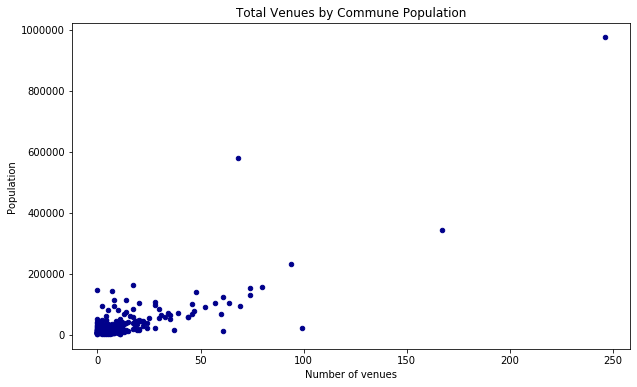

In [18]:
df_se.plot(kind='scatter', y='Population', x='NumVen', figsize=(10, 6), color='darkblue')

plt.title('Total Venues by Commune Population')
plt.xlabel('Number of venues')
plt.ylabel('Population')

plt.show()


### But we are interested in saturation - 
### so let's add to our dataframe the number of venues per 100 000 people

In [19]:
df_se['VenPer1000'] = df_se['NumVen']/df_se['Population']*100000
df_se

,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2,4.274783
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3,8.800235
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5,6.250781
5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225,8,27.884280
6,126,277.8,112848,Huddinge kommun,140.67,59.236330,17.982156,14,12.406068
7,127,231.8,94606,Botkyrka kommun,222.31,59.245941,17.840858,8,8.456123
8,128,288.4,16750,Salems kommun,71.09,59.200000,17.766667,4,23.880597
9,136,260.2,92095,Haninge kommun,2161.18,59.182724,18.151091,52,56.463434


### And plot it again as Saturation vs Average Income in the commune

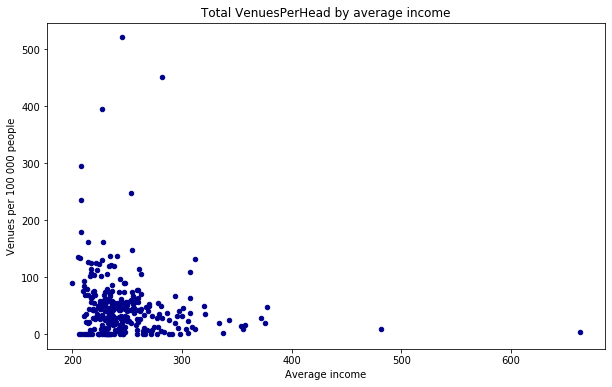

In [20]:
df_se.plot(kind='scatter', y='VenPer1000', x='Av_income', figsize=(10, 6), color='darkblue')

plt.title('Total VenuesPerHead by average income')
plt.xlabel('Average income')
plt.ylabel('Venues per 100 000 people')

plt.show()

### We see that we can exclude a number of communes from our analysis:
### - 2 very rich communes with almost no venues. 
###    Obviously, there live very rich people who do not want or need any activities in their living quarters.
### - Some communes that have extremely high number of venues (>150) 
###    and are not correspondingly rich.

In [21]:
df_se_filt1=df_se[df_se['Av_income']<450]
df_se_filt1.shape

(288, 9)

In [22]:
df_se_filt2=df_se_filt1[df_se_filt1['VenPer1000']<150]
df_se_filt2.shape



(279, 9)

### So now we have the list of communes most interesting for our analysis:

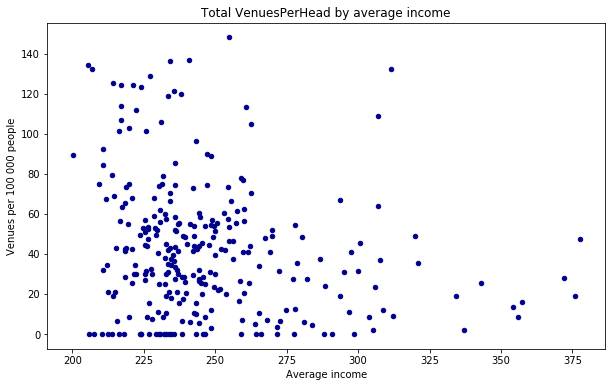

In [23]:
df_se_filt2.plot(kind='scatter', y='VenPer1000', x='Av_income', figsize=(10, 6), color='darkblue')

plt.title('Total VenuesPerHead by average income')
plt.xlabel('Average income')
plt.ylabel('Venues per 100 000 people')

plt.show()

### Let us try to cluster these communes

### Let's create a new dataframe with commune names, average income and venues per head

In [24]:
df_se_filt2_cl=df_se_filt2[['name','Av_income','VenPer1000']]
df_se_filt2_cl.head()

,name,Av_income,VenPer1000
0,Upplands Väsby kommun,283.9,4.274783
1,Vallentuna kommun,312.2,8.800235
2,Österåkers kommun,337.2,2.194234
3,Värmdö kommun,320.0,48.888889
4,Järfälla kommun,272.8,6.250781


### Estimating  optimum number of clusters using Elbow Method

In [25]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
df_se_filt2_cl=df_se_filt2[['name','Av_income','VenPer1000']]
df_se_filt2_cl.head()
communes_clustering = df_se_filt2_cl.drop('name', 1)

In [27]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(communes_clustering) 
    kmeanModel.fit(communes_clustering)     
      
    distortions.append(sum(np.min(cdist(communes_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / communes_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(communes_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / communes_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    

In [28]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 38.05577423256039
2 : 31.05411936945982
3 : 24.928910571887997
4 : 20.4081073281529
5 : 18.66438375967373
6 : 17.03368247101494
7 : 15.369847187018324
8 : 14.550163984446181
9 : 13.711984459716863
10 : 12.956804377156084
11 : 12.033623694455574
12 : 11.813108380909302
13 : 10.927413838982497
14 : 10.580108421497586
15 : 10.319244212577033
16 : 9.6443809727514
17 : 9.617130468054938
18 : 9.257543880585034
19 : 8.823079844284345


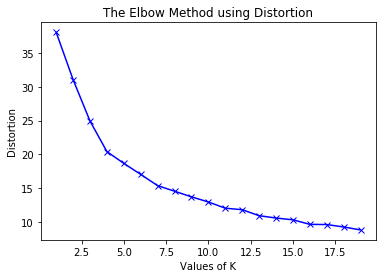

In [29]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [30]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 583625.0185253642
2 : 372929.3439576939
3 : 217489.27932695387
4 : 154744.09169468257
5 : 122777.50554539269
6 : 104724.61681922406
7 : 89779.74746590917
8 : 77136.39705990822
9 : 66504.63415672023
10 : 58408.600183635106
11 : 53151.533485852844
12 : 48357.357988659656
13 : 43024.76417261324
14 : 39810.127291847864
15 : 36874.62681020083
16 : 34493.75081984508
17 : 32579.851492637226
18 : 29214.737204996985
19 : 27806.19217300576


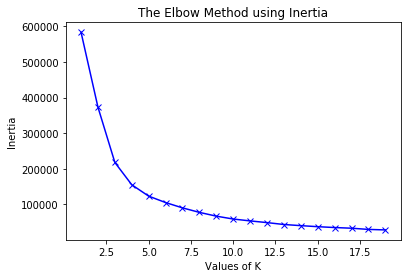

In [31]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### Looking at the plots above, we can estimate the optimum number of clusters 
### somewhere in the range from 3 to 6.
### Let us take 6.

### Run k-means to cluster the neighborhood into 6 clusters.

In [32]:
# set number of clusters
kclusters = 6

communes_clustering = df_se_filt2_cl.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(communes_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 5, 5, 4, 5, 4, 3, 4, 1])

### Let's create a new dataframe that includes the cluster as well as average income and venues per head

In [33]:
df_se_filt2.head()

,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
0,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2,4.274783
1,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3,8.800235
2,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5,6.250781


In [34]:
# add clustering labels
df_se_filt2.insert(0, 'Cluster Labels', kmeans.labels_)
df_se_filt2.head()



,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
0,4,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2,4.274783
1,4,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3,8.800235
2,5,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,5,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
4,4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5,6.250781


### Let us show the clustered communes on the map:

In [35]:
# create map
map_clusters = folium.Map(location=[63.461415, 16.104141], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, commune, cluster in zip(df_se_filt2['lat'], df_se_filt2['lon'], df_se_filt2['name'], df_se_filt2['Cluster Labels']):
    label = folium.Popup(str(commune) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let us look at the data on Saturation vs Average Income plot:

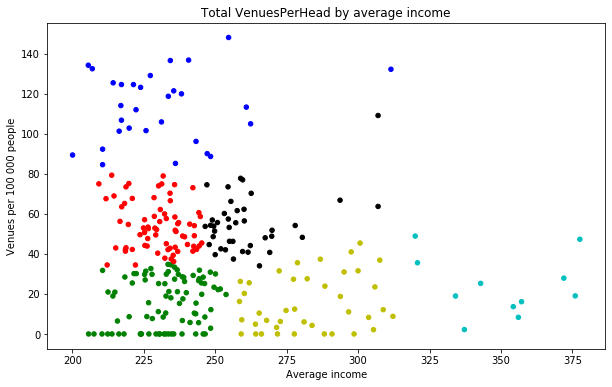

In [36]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'b',
                   3 : 'g',
                   4 : 'y',
                   5 : 'c'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in df_se_filt2['Cluster Labels']]
df_se_filt2.plot(kind='scatter', y='VenPer1000', x='Av_income', figsize=(10, 6), color=label_color)

plt.title('Total VenuesPerHead by average income')
plt.xlabel('Average income')
plt.ylabel('Venues per 100 000 people')

plt.show()

### We can see that the right-bottom cluster seems to be the most attractive
### with the highest income and close to lowest saturation.

### Let us examine clusters

In [37]:
df_se_filt2.head()

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
0,4,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2,4.274783
1,4,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3,8.800235
2,5,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,5,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
4,4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5,6.250781


### Cluster 1

In [38]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 0]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
27,0,319,228.9,9457,Älvkarleby kommun,614.85,60.568607,17.448913,5,52.870889
34,0,428,226.2,9111,Vingåkers kommun,439.45,59.046478,15.876965,4,43.902974
37,0,481,235.9,11983,Oxelösunds kommun,746.59,58.671147,17.107005,7,58.416089
43,0,509,231.3,5337,Ödeshögs kommun,668.99,58.229105,14.653021,4,74.948473
46,0,560,242.2,5476,Boxholms kommun,603.87,58.196690,15.047488,4,73.046019
49,0,563,217.3,7873,Valdemarsviks kommun,2049.57,58.202451,16.601363,5,63.508193
56,0,604,242.5,6848,Aneby kommun,553.89,57.838521,14.817802,3,43.808411
58,0,642,241.1,7290,Mullsjö kommun,211.04,57.916599,13.877317,4,54.869684
65,0,684,232.3,11677,Sävsjö kommun,729.56,57.398996,14.665814,7,59.946904
68,0,687,233.5,19003,Tranås kommun,437.74,58.035518,14.975696,8,42.098616


### Cluster 2

In [39]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 1]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
9,1,136,260.2,92095,Haninge kommun,2161.18,59.182724,18.151091,52,56.463434
24,1,191,261.5,48964,Sigtuna kommun,350.26,59.619146,17.723419,20,40.846336
25,1,192,259.6,28575,Nynäshamns kommun,1300.87,58.902926,17.946529,22,76.990376
28,1,330,307.0,18835,Knivsta kommun,295.11,59.724971,17.800603,12,63.711176
31,1,380,269.1,230767,Uppsala kommun,2234.44,59.858564,17.638927,94,40.733727
32,1,381,262.3,45287,Enköpings kommun,1323.82,59.849668,17.572654,20,44.162784
35,1,461,257.7,11365,Gnesta kommun,538.14,59.048531,17.306303,7,61.592609
36,1,480,258.9,56591,Nyköpings kommun,2066.54,58.752697,17.008567,44,77.750879
42,1,488,307.0,13747,Trosa kommun,664.67,58.898514,17.551353,15,109.114716
57,1,617,259.6,9712,Gnosjö kommun,450.05,57.358040,13.737190,4,41.186161


### Cluster 3

In [40]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 2]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
54,2,584,254.7,7428,Vadstena kommun,413.26,58.452140,14.899474,11,148.088314
73,2,765,260.9,17651,Älmhults kommun,978.22,56.550970,14.139023,20,113.308028
87,2,884,235.5,15647,Vimmerby kommun,1219.80,57.669034,15.858857,19,121.429028
88,2,885,238.2,10839,Borgholms kommun,3654.12,56.880230,16.656236,13,119.937264
91,2,1080,247.2,66622,Karlskrona kommun,3338.03,56.161224,15.586900,60,90.060340
112,2,1275,217.2,7492,Perstorps kommun,161.93,55.472630,13.023216,8,106.780566
115,2,1278,311.5,15128,Båstads kommun,889.25,56.426418,12.846166,20,132.205182
125,2,1291,248.4,19174,Simrishamns kommun,1262.16,55.557396,14.348965,17,88.661729
154,2,1460,210.6,9750,Bengtsfors kommun,1059.18,59.028612,12.226943,9,92.307692
167,2,1484,243.3,14555,Lysekils kommun,695.42,58.275573,11.435558,14,96.186877


### Cluster 4

In [41]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 3]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
7,3,127,231.8,94606,Botkyrka kommun,222.31,59.245941,17.840858,8,8.456123
17,3,181,239.0,98979,Södertälje kommun,694.57,59.195363,17.625689,28,28.288829
29,3,331,232.7,14047,Heby kommun,1225.58,60.009226,17.271459,0,0.000000
30,3,360,232.8,21136,Tierps kommun,2573.61,60.345896,17.516906,4,18.925057
33,3,382,251.8,22250,Östhammars kommun,3486.25,60.260408,18.371072,5,22.471910
38,3,482,221.6,16585,Flens kommun,826.04,59.057938,16.587912,5,30.147724
39,3,483,234.5,34755,Katrineholms kommun,1189.54,58.995551,16.205476,12,34.527406
40,3,484,239.3,106859,Eskilstuna kommun,1250.49,59.371249,16.509805,28,26.202753
44,3,512,234.7,3747,Ydre kommun,778.62,57.859519,15.297346,0,0.000000
45,3,513,243.2,9940,Kinda kommun,1301.96,57.953579,15.847964,1,10.060362


### Cluster 5

In [42]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 4]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
0,4,114,283.9,46786,Upplands Väsby kommun,83.82,59.519610,17.928340,2,4.274783
1,4,115,312.2,34090,Vallentuna kommun,368.45,59.530274,17.966711,3,8.800235
4,4,123,272.8,79990,Järfälla kommun,63.03,59.410065,17.836804,5,6.250781
6,4,126,277.8,112848,Huddinge kommun,140.67,59.236330,17.982156,14,12.406068
8,4,128,288.4,16750,Salems kommun,71.09,59.200000,17.766667,4,23.880597
10,4,138,303.7,48333,Tyresö kommun,100.52,59.242595,18.283392,4,8.275919
11,4,139,268.0,29346,Upplands-Bro kommun,325.23,59.509473,17.614412,2,6.815239
12,4,140,300.7,11014,Nykvarns kommun,176.99,59.178177,17.427816,5,45.396768
19,4,183,290.9,52414,Sundbybergs kommun,8.79,59.355521,18.003487,0,0.000000
20,4,184,308.8,82429,Solna kommun,20.66,59.368879,18.008433,10,12.131653


### Cluster 6

In [43]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
2,5,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,5,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
5,5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225,8,27.884280
13,5,160,377.6,71874,Täby kommun,71.22,59.441900,18.070330,34,47.305006
15,5,163,334.1,73857,Sollentuna kommun,57.96,59.439110,17.941480,14,18.955549
16,5,180,342.9,974073,Stockholms kommun,214.12,59.329324,18.068581,246,25.254781
18,5,182,376.0,105189,Nacka kommun,128.46,59.307903,18.156042,20,19.013395
22,5,187,356.1,12003,Vaxholms kommun,106.85,59.452788,18.183603,1,8.331251
98,5,1233,354.3,36628,Vellinge kommun,705.62,55.470893,13.019990,5,13.650759
103,5,1262,357.2,24834,Lomma kommun,90.20,55.670667,13.077576,4,16.106950


### Our cluster of interest is the cluster with Label=5
### Let us show it on the map

In [44]:
# create map of Sweden 
map_se = folium.Map(location=[58.176867, 14.966737], zoom_start=6)

# add markers to map

for name, lat, lon in zip(df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5]['name'], 
                          df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5]['lat'], 
                          df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5]['lon']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_se)  

    
map_se

### Let's also plot it separately from other clusters just to be sure that all is correct.

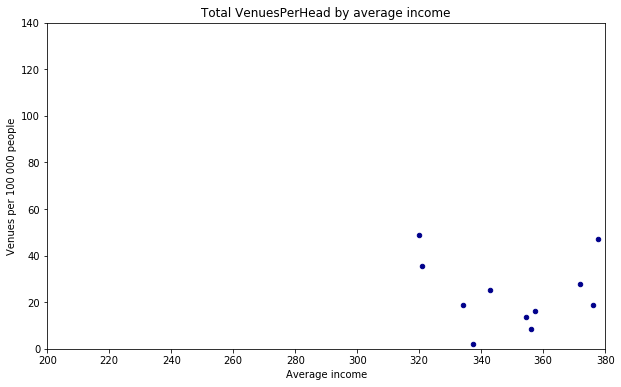

In [45]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5].plot(kind='scatter', y='VenPer1000', x='Av_income', figsize=(10, 6), color='darkblue')

plt.xlim([200, 380]) 
plt.ylim([0, 140]) 
plt.title('Total VenuesPerHead by average income')
plt.xlabel('Average income')
plt.ylabel('Venues per 100 000 people')

plt.show()

### And finally let's explicitly print the list of communes we can recommend 
### for starting new businesses based on above analysis:

In [46]:
df_se_filt2.loc[df_se_filt2['Cluster Labels'] == 5]

,Cluster Labels,Code,Av_income,Population,name,area,lat,lon,NumVen,VenPer1000
2,5,117,337.2,45574,Österåkers kommun,554.65,59.500058,18.352485,1,2.194234
3,5,120,320.0,45000,Värmdö kommun,2980.99,59.333333,18.383333,22,48.888889
5,5,125,372.0,28690,Ekerö kommun,384.53,59.279834,17.790225,8,27.884280
13,5,160,377.6,71874,Täby kommun,71.22,59.441900,18.070330,34,47.305006
15,5,163,334.1,73857,Sollentuna kommun,57.96,59.439110,17.941480,14,18.955549
16,5,180,342.9,974073,Stockholms kommun,214.12,59.329324,18.068581,246,25.254781
18,5,182,376.0,105189,Nacka kommun,128.46,59.307903,18.156042,20,19.013395
22,5,187,356.1,12003,Vaxholms kommun,106.85,59.452788,18.183603,1,8.331251
98,5,1233,354.3,36628,Vellinge kommun,705.62,55.470893,13.019990,5,13.650759
103,5,1262,357.2,24834,Lomma kommun,90.20,55.670667,13.077576,4,16.106950
